In [1]:
# Import important modules
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import sklearn
import PIL

In [2]:
# From Matplotlib and PIL we are importing the necessary libraries
from matplotlib import image
from PIL import Image
# Adding text to image
from PIL import ImageDraw, ImageFont
# We need to import ImageEnhance library to use its methods and attributes
from PIL import ImageEnhance
# To use the Image filters
from PIL import ImageFilter

# Function to take a color image and do following preprocessing steps
- creat a PIL object
- Resize
- Color Enhance and change to Grey scale
- Create Numpy array of Grey Scale image
- Flatten the Numpy array and return it

In [3]:
# Mules path
# "C:\Users\Kishore\197\MachineLearning\files_fonts\Mules\Mule (1).jpg"
# Horses path
# "C:\Users\Kishore\197\MachineLearning\files_fonts\Horses\Horse (1).jpg"

In [4]:
# Function to take one image and convert it in to flattened grey scale numpy array
def image_to_array(path):
    imagePil = Image.open(path)
    imageResized = imagePil.resize((28,28))
    imageColE = ImageEnhance.Color(imageResized)
    imageNp = np.array(imageColE.enhance(0))
    image_flatten = imageNp.flatten()
    return image_flatten

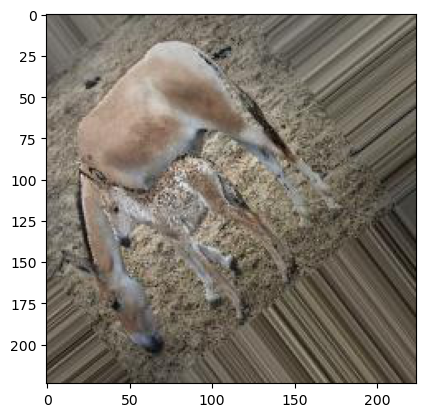

In [5]:
# Display a sample Mule image
plt.imshow(Image.open(r"C:\Users\Kishore\197\MachineLearning\files_fonts\Mules\Mule (1).jpg"))

In [6]:
# Create a sample array of the displayed Mule 
image_to_array(r"C:\Users\Kishore\197\MachineLearning\files_fonts\Mules\Mule (1).jpg")

array([107, 107, 107, ...,  86,  86,  86], dtype=uint8)

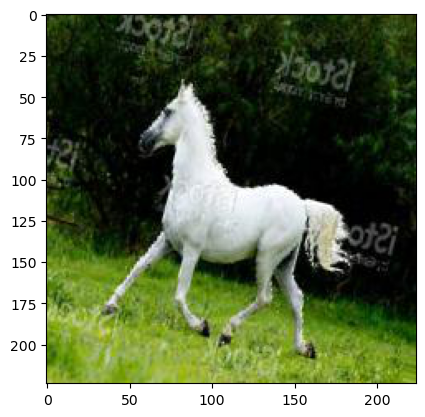

In [7]:
# Display a sample Horse image
plt.imshow(Image.open(r"C:\Users\Kishore\197\MachineLearning\files_fonts\Horses\Horse (1).jpg"))

In [8]:
# Create a sample array of the displayed horse
image_to_array(r"C:\Users\Kishore\197\MachineLearning\files_fonts\Horses\Horse (1).jpg")

array([ 54,  54,  54, ..., 133, 133, 133], dtype=uint8)

# Create a target column 
- Mule images will have text 'mule' in it
- Horse images will have text 'horse' in it
- Text will added based on what folder they are inputed from

# Iterate through the folder

In [9]:
# Image preprocessing function, output is append with an element with name mentioned and converted to list for easy manipulations
def image_to_list(path,name):
    imagePil = Image.open(path)
    imageResized = imagePil.resize((28,28))
    imageColE = ImageEnhance.Color(imageResized)
    imageNp = np.array(imageColE.enhance(0))
    image_flatten = imageNp.flatten()
    return list(np.append(image_flatten,name))

In [10]:
# At first we import the os module to interact with the operating system.
# Then we import listdir() function from os to get access to the folders given in quotes.
# Then with the help of os.listdir() function, we iterate through the images and printed the names in order.

import os
from os import listdir
# get the path/directory

animals = ['Mules','Horses']
final = []

for j in animals:
    folder_dir = (r"C:\Users\Kishore\197\MachineLearning\files_fonts\{}".format(j))
    
    for i in os.listdir(folder_dir):
        image_folder = (f"{folder_dir}\{i}")
        final.append(image_to_list(image_folder,j))

df = pd.DataFrame(final,dtype=object)
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352
0,107,107,107,92,92,92,110,110,110,118,...,78,78,78,76,76,76,86,86,86,Mules
1,234,234,234,234,234,234,234,234,234,234,...,178,178,178,169,169,169,147,147,147,Mules
2,42,42,42,50,50,50,50,50,50,39,...,145,145,145,150,150,150,150,150,150,Mules
3,196,196,196,196,196,196,197,197,197,195,...,130,130,130,123,123,123,115,115,115,Mules
4,173,173,173,174,174,174,173,173,173,174,...,109,109,109,98,98,98,84,84,84,Mules
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,202,202,202,167,167,167,125,125,125,117,...,198,198,198,199,199,199,198,198,198,Horses
2012,169,169,169,183,183,183,185,185,185,132,...,173,173,173,169,169,169,155,155,155,Horses
2013,153,153,153,161,161,161,157,157,157,135,...,236,236,236,233,233,233,228,228,228,Horses
2014,80,80,80,86,86,86,89,89,89,90,...,237,237,237,239,239,239,241,241,241,Horses


In [11]:
df.rename(columns = {2352:'animal'}, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,animal
0,107,107,107,92,92,92,110,110,110,118,...,78,78,78,76,76,76,86,86,86,Mules
1,234,234,234,234,234,234,234,234,234,234,...,178,178,178,169,169,169,147,147,147,Mules
2,42,42,42,50,50,50,50,50,50,39,...,145,145,145,150,150,150,150,150,150,Mules
3,196,196,196,196,196,196,197,197,197,195,...,130,130,130,123,123,123,115,115,115,Mules
4,173,173,173,174,174,174,173,173,173,174,...,109,109,109,98,98,98,84,84,84,Mules
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,202,202,202,167,167,167,125,125,125,117,...,198,198,198,199,199,199,198,198,198,Horses
2012,169,169,169,183,183,183,185,185,185,132,...,173,173,173,169,169,169,155,155,155,Horses
2013,153,153,153,161,161,161,157,157,157,135,...,236,236,236,233,233,233,228,228,228,Horses
2014,80,80,80,86,86,86,89,89,89,90,...,237,237,237,239,239,239,241,241,241,Horses


In [12]:
# We have mostly balanced data
df['animal'].value_counts()

Horses    1046
Mules      970
Name: animal, dtype: int64

# Identify Input and Output variables

In [13]:
# We identify the input and output variables
X = df.iloc[:,:-1]
y = df['animal']

# Split the data to Train and Test

In [14]:
#  split X & y in to xTrain, xTest, yTrain, yTest
# if we pass 2 arrays we get train & test of the first array, then train & test of the second array
# randome_state parameter in test_train_split is simillar to random_seed parameter in random function
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y,
                                                test_size= 0.32)

In [15]:
# check if input variable train and test has same size as target variable
# the rows have to be same for us to proceed
xTrain.shape, xTest.shape, len(yTrain), len(yTest)

((1370, 2352), (646, 2352), 1370, 646)

In [16]:
type(yTrain)

pandas.core.series.Series

# Build a Machine Learning Model

# Logistic Regression

In [17]:
# Import your model
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(max_iter=5000)

In [19]:
lr.fit(xTrain,yTrain)

C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [20]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on xTrain and xTest and we compare these
lr_yTrainPred = lr.predict(xTrain)
lr_yTestPred = lr.predict(xTest)

In [21]:
# Accuracy Check
from sklearn.metrics import accuracy_score as acs

# We use confusion matrix to see what the predictions were
from sklearn.metrics import confusion_matrix

In [22]:
acs(yTrain,lr_yTrainPred)

1.0

In [23]:
acs(yTest,lr_yTestPred)

0.4845201238390093

In [24]:
confusion_matrix(yTrain,lr_yTrainPred)

array([[688,   0],
       [  0, 682]], dtype=int64)

In [25]:
confusion_matrix(yTest,lr_yTestPred)

array([[163, 195],
       [138, 150]], dtype=int64)

In [26]:
# Not a good result with logistic regression
# We will try Support Vector Machines

# SVM

In [27]:
from sklearn import svm

In [28]:
dir(svm)

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bounds',
 '_classes',
 '_liblinear',
 '_libsvm',
 '_libsvm_sparse',
 'l1_min_c']

In [29]:
from sklearn.svm import SVC

In [30]:
sv = SVC(kernel='rbf')

In [31]:
sv.fit(xTrain,yTrain)

SVC()

In [32]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on xTrain and xTest and we compare these
sv_yTrainPred = sv.predict(xTrain)
sv_yTestPred = sv.predict(xTest)

In [33]:
acs(yTrain,sv_yTrainPred)

0.8408759124087591

In [34]:
confusion_matrix(yTrain,sv_yTrainPred)

array([[570, 118],
       [100, 582]], dtype=int64)

In [35]:
acs(yTest,sv_yTestPred)

0.5619195046439629

In [36]:
confusion_matrix(yTest,sv_yTestPred)

array([[196, 162],
       [121, 167]], dtype=int64)

In [37]:
# linear - 51%
# poly - 54%
# sigmoid - 50%
# rbf -  56%